<a href="https://colab.research.google.com/github/rajnishe/ML_Share_Doc/blob/master/WineDataTF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import pandas 
import pandas as pd

# Read in white wine data 
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
#white
# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [0]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

In [0]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
import numpy as np

# Specify the data 
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
# Import `StandardScaler` from `sklearn.preprocessing`
#http://benalexkeen.com/feature-scaling-with-scikit-learn/
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [0]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

In [0]:
m = tf.keras.models

In [8]:
# Initialize the constructor
model = m.Sequential()

# Add an input layer 
model.add(Dense(8, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(5, activation='relu'))


# Add one hidden layer 
#model.add(Dense(3, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])
                   
history = model.fit(X_train, y_train,epochs=6, batch_size=10, 
                    verbose=1,validation_split=0.2)

Train on 3481 samples, validate on 871 samples
Epoch 1/6
3481/3481 [==============================] - 1s 180us/sample - loss: 11.1495 - binary_accuracy: 0.7860 - val_loss: 2.8268 - val_binary_accuracy: 0.8668
Epoch 2/6
3481/3481 [==============================] - 1s 145us/sample - loss: 0.9490 - binary_accuracy: 0.9041 - val_loss: 0.3402 - val_binary_accuracy: 0.9173
Epoch 3/6
3481/3481 [==============================] - 1s 148us/sample - loss: 0.2914 - binary_accuracy: 0.9176 - val_loss: 0.2868 - val_binary_accuracy: 0.8886
Epoch 4/6
3481/3481 [==============================] - 1s 151us/sample - loss: 0.2540 - binary_accuracy: 0.9233 - val_loss: 0.2299 - val_binary_accuracy: 0.9334
Epoch 5/6
3481/3481 [==============================] - 1s 149us/sample - loss: 0.2317 - binary_accuracy: 0.9290 - val_loss: 0.2167 - val_binary_accuracy: 0.9437
Epoch 6/6
3481/3481 [==============================] - 1s 153us/sample - loss: 0.2115 - binary_accuracy: 0.9319 - val_loss: 0.1956 - val_binary_acc

In [17]:
score = model.evaluate(X_test, y_test, verbose=True)

print(score[1])



2145/2145 [==============================] - 0s 35us/sample - loss: 0.2383 - binary_accuracy: 0.9277
0.9277389


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


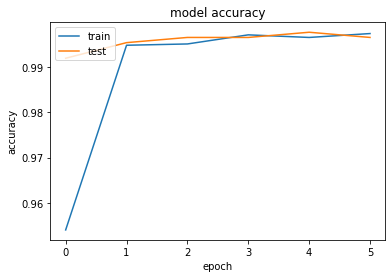

In [13]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()